In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import kde
from scipy.stats import ttest_ind
from scipy import stats
%matplotlib inline 

In [2]:
data = pd.read_csv('Police Shootings Age Race.csv')

In [3]:
data.shape

(6054, 2)

In [4]:
data.groupby('race').size()

race
B    2078
W    3976
dtype: int64

In [5]:
black_data = data[data['race'] == 'B']['age']
white_data = data[data['race'] == 'W']['age']

In [6]:
print("Average age difference between Black people vs White people shot by the Police: {:.2f}".format(white_data.mean() - black_data.mean()))

Average age difference between Black people vs White people shot by the Police: 7.22


In [7]:
print("Minimum age of black people shot by police:", min(black_data))
print("Maximum age of black people shot by police:", max(black_data))
print("Average age of black people shot by police: {:.2f}".format(black_data.mean()))
print("Median age of black people shot by police: {:.2f}".format(black_data.median()))
print("Standard Deviation of black people shot by police: {:.2f}".format(black_data.std()))
print("Skewness of the age distribution of black people shot by police: {:.4f}".format(skew(black_data, axis=0, bias=True)))
print("Kurtosis of the age distribution of black people shot by police: {:.4f}".format(kurtosis(black_data, axis=0, bias=True)))

Minimum age of black people shot by police: 8
Maximum age of black people shot by police: 88
Average age of black people shot by police: 33.05
Median age of black people shot by police: 31.00
Standard Deviation of black people shot by police: 11.45
Skewness of the age distribution of black people shot by police: 0.9472
Kurtosis of the age distribution of black people shot by police: 0.8262


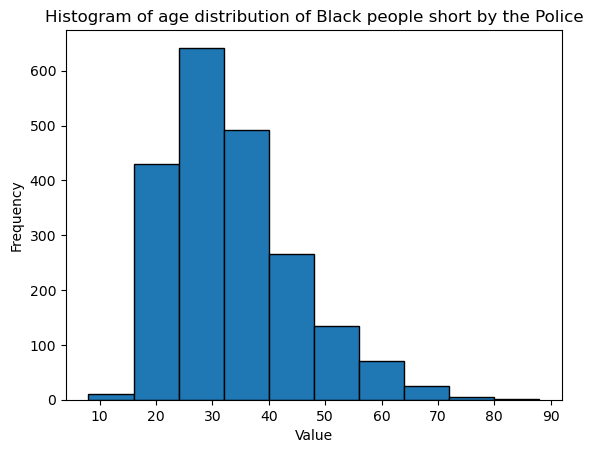

In [8]:
# Create histogram
plt.hist(black_data, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of age distribution of Black people short by the Police')
plt.show()

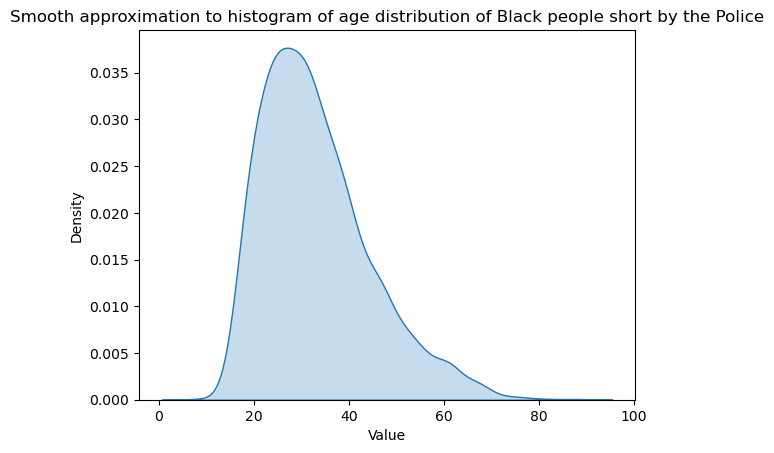

In [9]:
# Create KDE plot
sns.kdeplot(black_data, fill=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Smooth approximation to histogram of age distribution of Black people short by the Police')
plt.show()

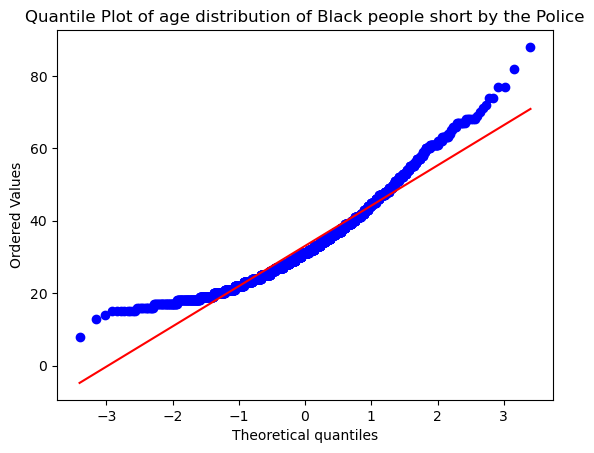

In [10]:
# Create QQ plot
plt.figure()
stats.probplot(black_data, dist="norm", plot=plt)
plt.title('Quantile Plot of age distribution of Black people short by the Police')
plt.show()

In [11]:
print("Minimum age of white people shot by police:", min(white_data))
print("Maximum age of white people shot by police:", max(white_data))
print("Average age of white people shot by police: {:.2f}".format(white_data.mean()))
print("Median age of white people shot by police: {:.2f}".format(white_data.median()))
print("Standard Deviation of white people shot by police: {:.2f}".format(white_data.std()))
print("Skewness of the age distribution of white people shot by police: {:.4f}".format(skew(white_data, axis=0, bias=True)))
print("Kurtosis of the age distribution of white people shot by police: {:.4f}".format(kurtosis(white_data, axis=0, bias=True)))

Minimum age of white people shot by police: 2
Maximum age of white people shot by police: 91
Average age of white people shot by police: 40.27
Median age of white people shot by police: 38.00
Standard Deviation of white people shot by police: 13.09
Skewness of the age distribution of white people shot by police: 0.5421
Kurtosis of the age distribution of white people shot by police: -0.0553


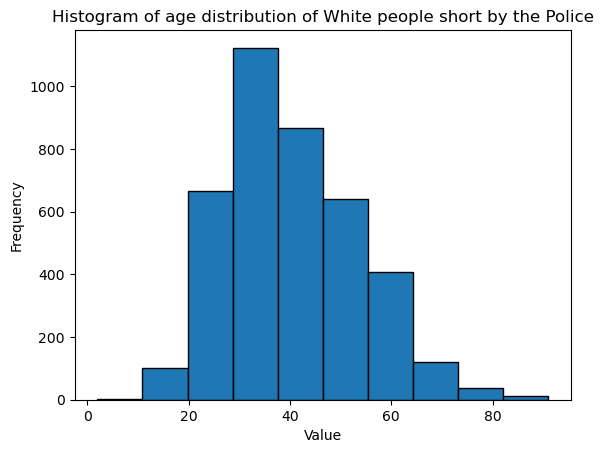

In [12]:
# Create histogram
plt.hist(white_data, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of age distribution of White people short by the Police')
plt.show()

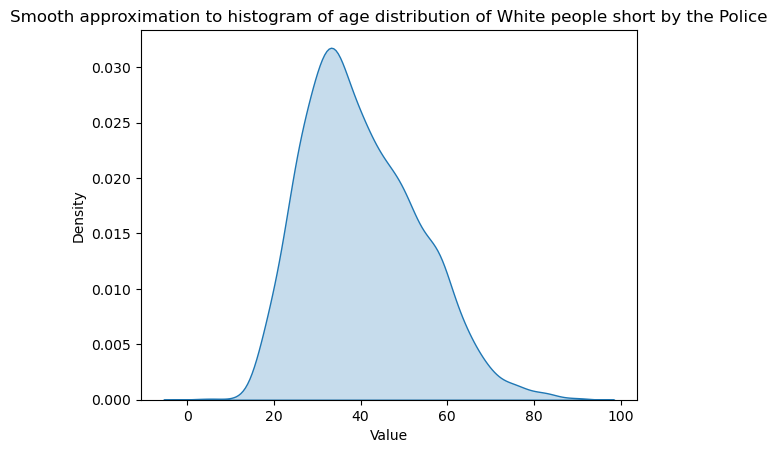

In [13]:
# Create KDE plot
sns.kdeplot(white_data, fill=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Smooth approximation to histogram of age distribution of White people short by the Police')
plt.show()

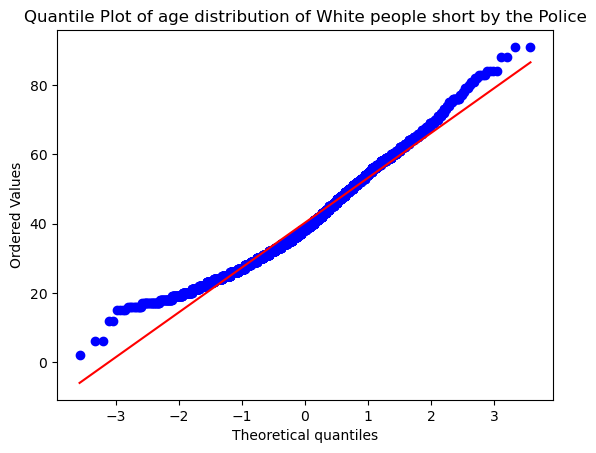

In [14]:
# Create QQ plot
plt.figure()
stats.probplot(white_data, dist="norm", plot=plt)
plt.title('Quantile Plot of age distribution of White people short by the Police')
plt.show()

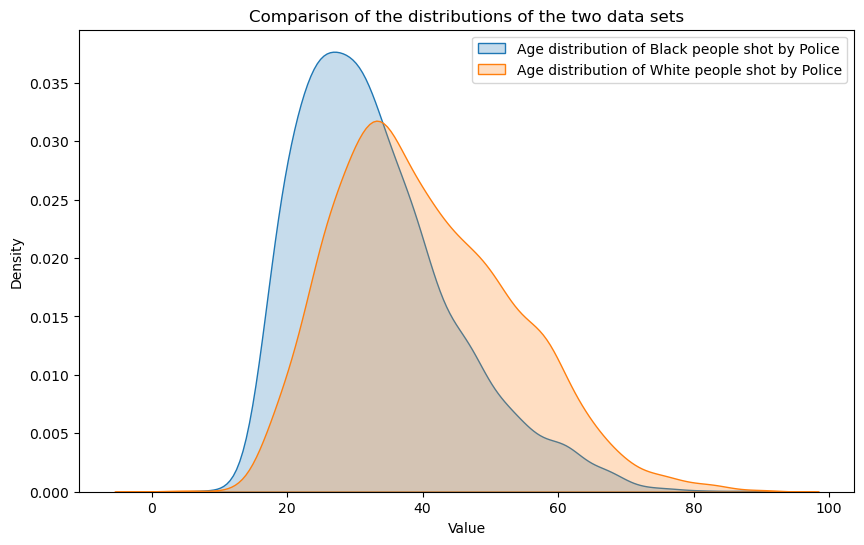

In [15]:
plt.figure(figsize=(10, 6))
sns.kdeplot(black_data, fill=True, label='Age distribution of Black people shot by Police')
sns.kdeplot(white_data, fill=True, label='Age distribution of White people shot by Police')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Comparison of the distributions of the two data sets')
plt.legend()
plt.show()

### Comparison of Cumulative Distributions

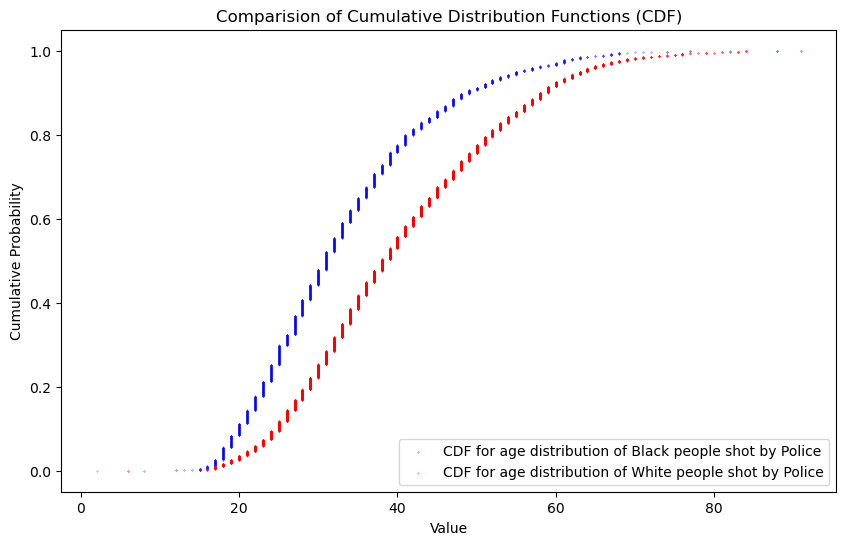

In [16]:
# Sort the data for both datasets
sorted_black_data = np.sort(black_data)
sorted_white_data = np.sort(white_data)

# Calculate the cumulative probabilities for both datasets
cumulative_prob1 = np.arange(1, len(sorted_black_data) + 1) / len(sorted_black_data)
cumulative_prob2 = np.arange(1, len(sorted_white_data) + 1) / len(sorted_white_data)

plt.figure(figsize=(10, 6))
plt.scatter(sorted_black_data, cumulative_prob1, label='CDF for age distribution of Black people shot by Police', s=0.05, color='blue')
plt.scatter(sorted_white_data, cumulative_prob2, label='CDF for age distribution of White people shot by Police', s=0.05, color='red')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('Comparison of Cumulative Distribution Functions (CDF)')
plt.legend()
plt.show()


### Cohen's d for Effect Size

In [17]:
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    n1, n2 = len(d1), len(d2)
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    u1, u2 = np.mean(d1), np.mean(d2)
    return (u2 - u1) / s

In [18]:
cohend_value = cohend(black_data, white_data)
print(f"Cohen's d: {cohend_value}")

Cohen's d: 0.5754223321506542


## Statistical Significance

A standard way to test for statistical significance is to calculate a p-value. There are two common ways to calculate a ***p-value*** by using:
 - a **T-test** (assuming the data is approximately normally distributed) or
 - by using a **Monte Carlo Method** otherwise.

### T-test

In [19]:
# T-test for statistical significance
t_stat, p_value_t = ttest_ind(black_data, white_data)
print(f"t-test: {t_stat}")
print(f"p-value (T-Test): {p_value_t}")

t-test: -21.257464575572655
p-value (T-Test): 9.020231053936359e-97


The **T-test** assumes that the data is approximately normally distributed. However, our data is slightly postively skewed. So we will calculate the ***p-value*** using Monte Carlo method

### Monte - Carlo Test

In [20]:
max_simulations = 10000000

# Pooled ages, total, and lengths
PooledAges = np.concatenate((black_data, white_data))
total = np.sum(PooledAges)
w = len(white_data)
b = len(black_data)

# Observed difference in means
diff = np.mean(white_data) - np.mean(black_data)

# Monte Carlo simulation
r = 0
for n in range(1, max_simulations + 1):
    A = np.random.choice(PooledAges, size=w, replace=False)  # Random sample without replacement
    x = np.mean(A)
    y = (total - np.sum(A)) / b
    if x - y > diff:
        r += 1

# Calculate p-value
p_value_mc = (r + 1) / (n + 1)

print("p-value (Monte Carlo)=", p_value_mc)


p-value (Monte Carlo)= 9.9999990000001e-08
